# Boosting
 - weak learner에 대해 맞추지 못한 data에 weight를 주어 학습을 하는 방식
 - 지정한 반복 횟수 만큼 학습(반복이 많으면 overfitting에 문제가 있을수 있음.)
 - bagging과 똑같이 데이터를 복원추출

## AdaBoost(Adaptive Boosting)
 - additive model(가법 기법)을 기반으로 한 모델
 - 각 학습때 잘 맞추지 못하는 데이터에 가중치를 주어 다음 학습때 샘플링(복원추출)이 되게 하여 학습을 하는 방법
 - $$ H(x) = sign{\sum_{m=1}^M a_m*h_m(x)} $$
 - $ a_m $ : $h_m(x)$에 대한 가중치 ($h_m(x)$ 가 잘맞추면 가중치는 크고 못맞추면 낮다.) 

### AdaBoost params
 - base_estimator : 기본 learner (default = None)
 - n_estimators : 반복 횟수 (default = 50)
 - learning_rate : weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수, 기존 모델이 새로운모델에 얼마나 기여를 할지를 결정 (default = 1.0)
 - algorithm : 가중치를 주는 알고리즘 {'SAMME','SAMME.R'}  (default= 'SAMME.R')
 * n_estimators, learning_rate 두개는 서로 trade-off 관계이다(n_estimators를 높이고 learning_rate를 낮추면 효과가 상쇄된다.)

### AdaBoost example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
err_data_target = pd.read_csv('./err_model_nm_target.csv')
train_data = err_data_target.drop(['user_id','model_nm','target'],axis =1)
target_data = err_data_target['target']

In [3]:
train_data

,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,...,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42
0,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,0.0,...,10.0,18.0,0.0,1.0,1.0,0.0,0.0,113.0,56.0,1.0
1,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,8.0,0.0,0.0,1.0,1.0,2.0,0.0,17.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,16.0,1.0,0.0,0.0,0.0,0.0,0.0,102.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,0.0,0.0,0.0,29.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7251,0.0,0.0,4.0,95.0,4.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,12.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0


In [4]:
from sklearn.model_selection import train_test_split
train_data , test_data, train_target, test_target = train_test_split(train_data, target_data)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

 - randomizedSearchCV로 하이퍼파라미터 튜닝

In [6]:
from scipy.stats import uniform,randint
params = {'min_impurity_decrease': uniform(0.0001,0.001),
          'min_samples_split': range(2,25),
          'min_samples_leaf': range(1,25),
          'max_depth': range(3,20)}
from sklearn.model_selection import RandomizedSearchCV
rd = RandomizedSearchCV(DecisionTreeClassifier(random_state=10),params, n_iter = 100,random_state = 42)
rd.fit(train_data,train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=10),
                   n_iter=100,
                   param_distributions={'max_depth': range(3, 20),
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AE7D6359D0>,
                                        'min_samples_leaf': range(1, 25),
                                        'min_samples_split': range(2, 25)},
                   random_state=42)

In [7]:
print(rd.best_params_)

{'max_depth': 6, 'min_impurity_decrease': 0.0008121792213475359, 'min_samples_leaf': 1, 'min_samples_split': 15}


In [8]:
tree = DecisionTreeClassifier(max_depth = 17, min_impurity_decrease=0.0010900538501042634, min_samples_leaf=2, min_samples_split=11)
ad_model = AdaBoostClassifier(base_estimator=tree, learning_rate=0.5,n_estimators=100)
ad_model.fit(train_data, train_target)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=17,
                                                         min_impurity_decrease=0.0010900538501042634,
                                                         min_samples_leaf=2,
                                                         min_samples_split=11),
                   learning_rate=0.5, n_estimators=100)

In [9]:
from sklearn.metrics import *
pred_proba = ad_model.predict_proba(test_data)

print('train_score:',ad_model.score(train_data,train_target))
print('test_score:',ad_model.score(test_data,test_target))
print('AUC:',roc_auc_score(test_target, pred_proba[:,1]))

train_score: 0.8395515530233413
test_score: 0.7861080485115767
AUC: 0.7612852513715551


 - learning_rate 변경

In [10]:
ad_model = AdaBoostClassifier(base_estimator=tree, learning_rate=0.55,n_estimators=100)
ad_model.fit(train_data, train_target)
pred_proba = ad_model.predict_proba(test_data)

print('train_score:',ad_model.score(train_data,train_target))
print('test_score:',ad_model.score(test_data,test_target))
print('AUC:',roc_auc_score(test_target, pred_proba[:,1]))

train_score: 0.8443300863811799
test_score: 0.7877618522601985
AUC: 0.7656928663858626


 - n_estimators 변경

In [11]:
n_ = [100,200,300,400,500,600,1000]
for i in n_ :
    ad_model = AdaBoostClassifier(base_estimator=tree, learning_rate=0.55,n_estimators=i)
    ad_model.fit(train_data, train_target)
    pred_proba = ad_model.predict_proba(test_data)

    print('train_score:',ad_model.score(train_data,train_target))
    print('test_score:',ad_model.score(test_data,test_target))
    print('AUC:',roc_auc_score(test_target, pred_proba[:,1]))
    print('----------------------------------------')

train_score: 0.8443300863811799
test_score: 0.7877618522601985
AUC: 0.7656928663858626
----------------------------------------
train_score: 0.8443300863811799
test_score: 0.7877618522601985
AUC: 0.7656928663858626
----------------------------------------
train_score: 0.8443300863811799
test_score: 0.7877618522601985
AUC: 0.7657478660879475
----------------------------------------
train_score: 0.8443300863811799
test_score: 0.7877618522601985
AUC: 0.7656928663858626
----------------------------------------
train_score: 0.8443300863811799
test_score: 0.7877618522601985
AUC: 0.7657478660879475
----------------------------------------
train_score: 0.8443300863811799
test_score: 0.7877618522601985
AUC: 0.7656928663858626
----------------------------------------
train_score: 0.8443300863811799
test_score: 0.7877618522601985
AUC: 0.7656928663858626
----------------------------------------


# Gradient Boosting
 - 이전 반복에 $H(x)$ 모델에 대해 오차에 대한 예측을 하는 모델
 - $ y = h_m(x) + error $ -> $error = h_1(x) +error$ -> $...$ -> $ y = h_0(x) + h_1(x) + ... + error$
 - grandient라고 부르는 이유는 loss 함수의 미분이 잔차의 음에 계수와 같아서 이다.

## XGboost
 - gbm(기본 gradient boostion model) 보다 빠르다.
 - overfitting을 줄일수 있다.
 - CART(Classification and Regression Tree)를 기반으로 한다. 즉 트리 기반모델
 - Early Stopping을 제공 -> 과적합 방지
 - 목적식에  Regularization term을 주어 overfitting을 방지
 - $$obj_t = \sum_{i=1}^n l(Y_i,\hat Y_i) + \sum_{i=1}^n\Omega(f_i)$$
 - $ \sum_{i=1}^n\Omega(f_i)$ : Regularization term

### XGboost params
 - booster : {gbtree, gblinear} (default = gbtree)
 - verbosity : 메세지 조절 {0 (무음), 1 (경고), 2 (정보), 3 (디버그)}
 - n_estimators : 반복 횟수 (default = 50)
 - learning_rate 
 - max_depth 
 - gamma : 최소 손실 감소량 (트리 기반이므로 다음 노드로 넘어가는 기준) (default = 0)
 - subsample : 데이터 샘플링 비율 (default = 1)
 - colsubample : 변수의 샘플링 비율 (default = 1)
 - min_child_weight : 자식 노드의 weight의 합계 (합계가 설정보다 안나올시 노드분할을 하지 않는다.) (default = 1)
 - max_delta_step : 각 리프 출력을 허용하는 최대 델타 값 (default = 0), 일반적으로 사용하지 않음, 클래스가 극도로 불균형 한 경우 로지스                     틱 회귀에 도움이 될 수 있다.
 - lambda : L2 nrom
 - alpha : L1 nrom
 - objective : 목적함수 종류 {binary:logistic(이진 분류), multi:softmax(다중 분류), multi-softprob(다중 확률)}(더있지만 자주 쓰는것들)
 
### fit params
 - eval_set : 검증 데이터셋
 - eval_metric : 정확도 관련 지표를 활용하므로 설정해 주어야됨 ex) mse, auc etc...
 - early_stopping_rounds : eval_set, eval_metric을 기준으로 조기종료를 결정.
 

### XGboost example

In [12]:
import xgboost as xgb

In [13]:
xgb_dtrain = xgb.DMatrix(data = train_data, label = train_target) # 학습 데이터를 XGBoost 모델에 맞게 변환
xgb_dtest = xgb.DMatrix(data = test_data)
xgb_param = {'max_depth': 12,
             'learning_rate': 0.03,
            'n_estimators': 100,
            'objective': 'binary:logistic',
            'subsample': 0.6,
            'colsubsample':0.8}
xgb_model = xgb.train(params=xgb_param, dtrain=xgb_dtrain,num_boost_round=100)

[16:23:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsubsample, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:23:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
from sklearn.metrics import *
pred = xgb_model.predict(xgb_dtest)
a =0.5


print('train_score:',accuracy_score(train_target,np.where(xgb_model.predict(xgb_dtrain) >a,1,0)))
print('test_score:',accuracy_score(test_target,np.where(pred>a,1,0)))
print('AUC:',roc_auc_score(test_target, pred))

train_score: 0.9250137842308399
test_score: 0.7921719955898566
AUC: 0.7926839701840505


In [15]:
pred

array([0.8814361 , 0.18251161, 0.19391662, ..., 0.05549373, 0.42546234,
       0.49011493], dtype=float32)

## Light GBM
  - tree 기반 모델
  - 다른 tree기반 모델과는 다르게 Leaf_wise_growth에 형태를 가진다.
  - Leaf_wise_growth로 인해 loss를 줄 일 수 있다고 한다.
  - Leaf_wise_growth를 사용하면 overfitting에 민감하게 되어 대량에 데이터를 사용 할 때 좋다고 한다.
  - lightgbm 또한 xgboost처럼 Regularization term이 있다.
  - xgboost에 비해 속도가 빠르다.또한 GPU지원도 한다고 한다.

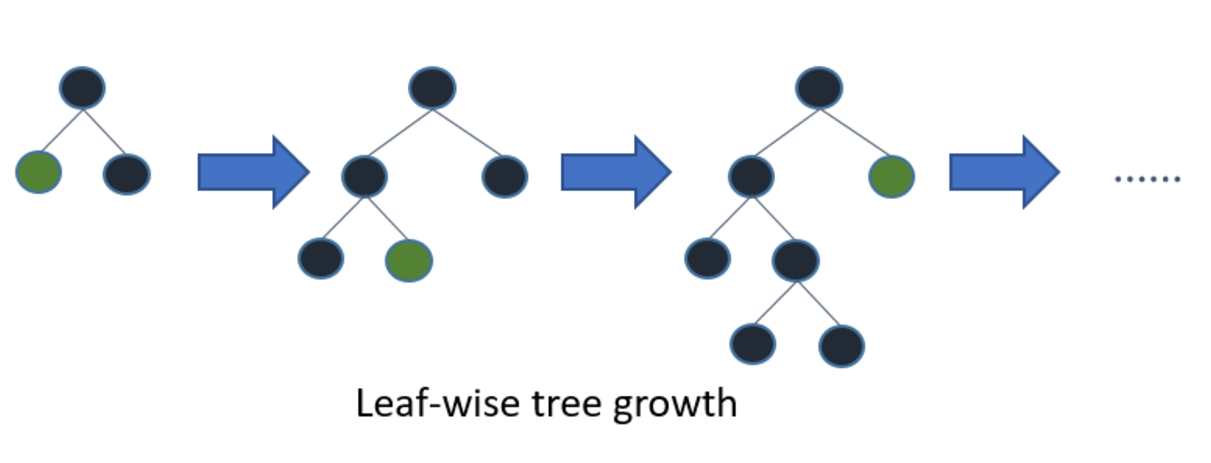

In [16]:
from IPython.display import Image  
Image('./leaf-wise-tree.png',width=500,height=1000)

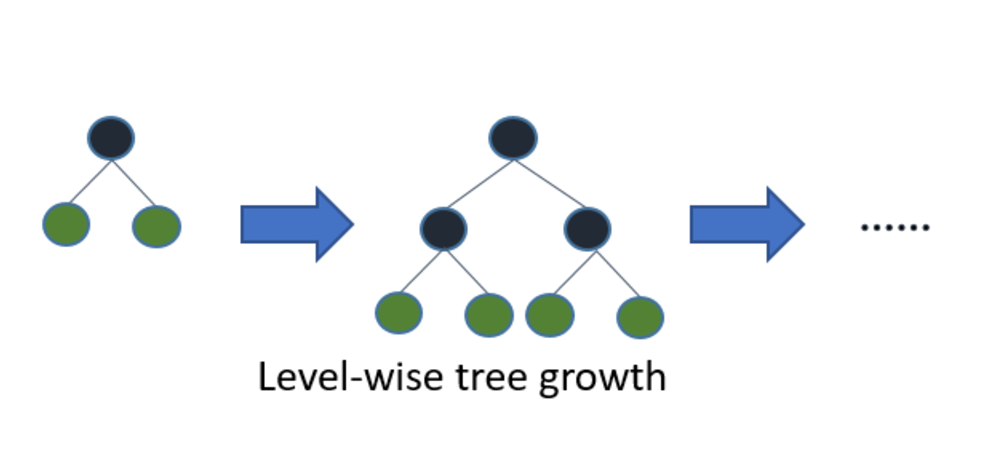

In [17]:
Image('./level-wise-tree.png',width=500,height=1000)

### Light GBM params
 - boosting_type : (default='gbdt') {gbdt, dart, goss, rf}
 - num_leaves: (default = 31), tree의 최대 leaf 수
 - max_depth 
 - num_boost_round : boosting 횟수 
 - learning_rate
 - objective
 - min_data_in_leaf: leaf 하나에 들어 있어야 되는 최소 갯수
 - metric : loss 평가 지표
 - early_stopping_rounds 
 - feval : 사용자 지정 평가 지표
 - verbose_eval : 진행사항 표시 ex) verbose_eval를 20으로 하면 20번마다 진행사항 출력
 - subsample
 - colsubample

### Light GBM example

In [18]:
import lightgbm as lgb

In [19]:
lgb_dtrain = lgb.Dataset(data= train_data,label=train_target)
lgb_param = {'boosting_type':'gbdt',
             'num_leaves': 20,
             'max_depth':12,
             'num_boost_round':100,
             'learning_rate':0.03,
             'objective':'binary',
             'metric': 'auc',
             'subsample': 0.7}

lgb_model = lgb.train(params=lgb_param, train_set=lgb_dtrain)

C:\anan\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Number of positive: 1462, number of negative: 3979
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3235
[LightGBM] [Info] Number of data points in the train set: 5441, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268701 -> initscore=-1.001225
[LightGBM] [Info] Start training from score -1.001225


In [20]:
from sklearn.metrics import *
pred = lgb_model.predict(test_data)

print('train_score:',accuracy_score(train_target,np.where(lgb_model.predict(train_data)>a,1,0)))
print('test_score:',accuracy_score(test_target,np.where(pred>a,1,0)))
print('AUC:',roc_auc_score(test_target, pred))

train_score: 0.8413894504686639
test_score: 0.7965821389195149
AUC: 0.7902051641664719


## Catboost
 - unbiased boostion with categorical features
 - 잔차 추정의 분산을 최소로 하면서 bias를 피하는 boostiong기법
 - 관측치를 포함하지 않고 그 관측치에 대한 unbiased residual을 구하는 기법
 - categorical features가 많을 때 효과적이다.
 - categorical features를 one-hot encoding이 아니라 수치형으로 변환하는 방법 제안
   - mean-encoding이 아니라 Ordered Target Encoding을 시행한다.(오버피팅을 방지)
 - XGboost와 같이 Level wise tree를 기반으로 한다.
 - 하이퍼 파라미터튜니에 부담이 없다. (catboost 내부에 overfitting을 방지하는 알고리즘이 많으므로)
 - Categorical Feauture Combinations 알고리즘이 내장되어 있다.

### Catboost params
 - loss_function
 - iterations
 - bootstrap_type
 - max_depth
 - loss_function, objective

### Catboost example

In [21]:
import catboost as cb

In [22]:
cb_dtrain = cb.Pool(data = train_data, label = train_target)
cb_param = {'max_depth': 12,
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'MultiClass',
            'learning_rate': 0.03,
            'n_estimators': 100}
cb_model = cb.train(pool = cb_dtrain, params = cb_param,verbose=20)

0:	learn: 0.7906635	total: 712ms	remaining: 1m 10s
20:	learn: 0.8149237	total: 11.6s	remaining: 43.6s
40:	learn: 0.8250322	total: 21.7s	remaining: 31.3s
60:	learn: 0.8364271	total: 32.4s	remaining: 20.7s
80:	learn: 0.8446977	total: 43.1s	remaining: 10.1s
99:	learn: 0.8500276	total: 52.8s	remaining: 0us


In [23]:
from sklearn.metrics import *
pred = cb_model.predict(test_data)

print('train_score:',accuracy_score(train_target,np.argmax(cb_model.predict(train_data),axis =1)))
print('test_score:',accuracy_score(test_target,np.argmax(pred,axis=1)))
print('AUC:',roc_auc_score(test_target, pred[:,1]))

train_score: 0.8500275684616798
test_score: 0.802646085997795
AUC: 0.783493672742606


# Stacking
 - API가 따로 있지는 않다.
 - 여러 모델들을 학습시킨후 나온 predict값을 train_data로사용

## Stracking example

In [32]:
xgb_pred = xgb_model.predict(xgb_dtest)
lgb_pred = lgb_model.predict(test_data)
cb_pred = cb_model.predict(test_data)
print(cb_pred)
print(lgb_pred)
print(xgb_pred)

[[-0.52840208  0.52840208]
 [ 0.56663001 -0.56663001]
 [ 0.60467082 -0.60467082]
 ...
 [ 0.95338046 -0.95338046]
 [ 0.20212411 -0.20212411]
 [ 0.15619948 -0.15619948]]
[0.85136198 0.22936472 0.17357736 ... 0.0604444  0.41626854 0.43768158]
[0.8814361  0.18251161 0.19391662 ... 0.05549373 0.42546234 0.49011493]


In [33]:
new_data = np.array([np.argmax(cb_pred,axis =1),
                     np.where(lgb_pred>a,1,0),
                     np.where(xgb_pred>a,1,0)])
new_data.shape

(3, 1814)

In [39]:
np.argmax(cb_pred,axis =1)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
new_data = np.transpose(new_data)
new_data.shape

(1814, 3)

In [41]:
new_data_ = np.array([cb_pred[:,1],lgb_pred,xgb_pred])
new_data_ = np.transpose(new_data_)

In [45]:
lgb_dtrain_st_ = lgb.Dataset(data= new_data_,label=test_target)
lgb_st_ = lgb.train(params=lgb_param,train_set = lgb_dtrain_st_)
lgb_pred_st_ = lgb_st_.predict(new_data_)


print('test_score:',accuracy_score(test_target,np.where(lgb_pred_st_>0.4,1,0)))
print('AUC:',roc_auc_score(test_target, lgb_pred_st_))

[LightGBM] [Info] Number of positive: 497, number of negative: 1317
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1814, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.273980 -> initscore=-0.974522
[LightGBM] [Info] Start training from score -0.974522
test_score: 0.8461962513781698
AUC: 0.8908019109340936


C:\anan\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [46]:
cb_dtrain_st = cb.Pool(data = new_data_, label = test_target)
cb_model_st = cb.train(pool = cb_dtrain_st, params = cb_param,verbose=20)
cb_pred_st = cb_model_st.predict(new_data_)

print('test_score:',accuracy_score(test_target,np.argmax(cb_pred_st,axis=1)))
print('AUC:',roc_auc_score(test_target, cb_pred_st[:,1]))

0:	learn: 0.8059537	total: 224ms	remaining: 22.2s
20:	learn: 0.8070562	total: 4.38s	remaining: 16.5s
40:	learn: 0.8087100	total: 8.58s	remaining: 12.3s
60:	learn: 0.8087100	total: 12.6s	remaining: 8.09s
80:	learn: 0.8125689	total: 16.8s	remaining: 3.94s
99:	learn: 0.8120176	total: 20.8s	remaining: 0us
test_score: 0.8120176405733186
AUC: 0.8394306614172506
